In [169]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [170]:
%matplotlib inline

In [220]:
ts = pd.read_csv('billtopsong.csv')
ts.head()

,artists,name,ranking,year
0,Daniel Powter,BAD DAY,1,2006
1,Sean Paul,TEMPERATURE,2,2006
2,Nelly Furtado Featuring Timbaland,PROMISCUOUS,3,2006
3,James Blunt,YOU'RE BEAUTIFUL,4,2006
4,Shakira Featuring Wyclef Jean,HIPS DON'T LIE,5,2006


In [222]:
ts['artists'] = ts['artists'].map(lambda i: i.split(' Featuring')[0])
ts.head()
top_song = [i.split(',')[0] for i in top_song]
#top_song = [i.split(' &')[0] for i in top_song]
#top_song = [i.split(' +')[0] for i in top_song]
#top_song = [i.split('Jay Z ')[0] for i in top_song]
#top_song= list(map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x), top_song))
#pd.DataFrame({'artists':top_song})
#top_song.loc[:,'count'] = ts.artists.value_counts
#top_song.loc[:,'count'] = pd.DataFrame.from_dict(Counter(top_song),orient='index').sort_values(0,ascending=False).reset_index()


,artists,name,ranking,year
0,Daniel Powter,BAD DAY,1,2006
1,Sean Paul,TEMPERATURE,2,2006
2,Nelly Furtado,PROMISCUOUS,3,2006
3,James Blunt,YOU'RE BEAUTIFUL,4,2006
4,Shakira,HIPS DON'T LIE,5,2006


In [208]:
top_song_count = pd.value_counts(top_song.artists).to_frame().reset_index()
top_song_count.columns = ['artists','Count']
top_song_count

,artists,Count
0,Taylor Swift,20
1,Rihanna,19
2,Katy Perry,14
3,Beyonce,11
4,Ne-Yo,10
5,Lady Gaga,10
6,Adele,10
7,The Black Eyed Peas,10
8,Drake,10
9,Maroon 5,10


In [30]:
df = top_song_count.copy()
df.loc[df.Count > 5]

,artists,Count
0,Taylor Swift,20
1,Rihanna,19
2,Katy Perry,14
3,Beyonce,11
4,Ne-Yo,10
5,Lady Gaga,10
6,Adele,10
7,The Black Eyed Peas,10
8,Drake,10
9,Maroon 5,10


In [98]:
a = [i.split(' Featuring')[0] for i in top_song['artists'].tolist()]
#a = [i.split(' ')[0] for i in a]
a = [i.split(',')[0] for i in a]
a = [i.split(' &')[0] for i in a]
a = [i.split(' +')[0] for i in a]
a = [i.split('Jay Z ')[0] for i in a]



In [153]:
import re
a = list(map(lambda x: re.sub('Jay[ ]+Z', 'Jay-Z', x), a))

In [154]:
from collections import Counter
Counter()

Counter()

In [158]:
print(Counter(a))

Counter({'Rihanna': 30, 'Taylor Swift': 21, 'Drake': 20, 'Chris Brown': 18, 'Katy Perry': 17, 'Beyonce': 15, 'Maroon 5': 13, 'Lady Gaga': 13, 'Justin Timberlake': 11, 'Ne-Yo': 11, 'Flo Rida': 11, 'Lil Wayne': 11, 'Usher': 11, 'Kelly Clarkson': 10, 'The Black Eyed Peas': 10, 'Britney Spears': 10, 'Adele': 10, 'Kanye West': 9, 'T.I.': 9, 'Miley Cyrus': 9, 'Justin Bieber': 9, 'Jason Derulo': 9, 'Nickelback': 8, 'Pitbull': 8, 'Ke$ha': 8, 'Bruno Mars': 8, 'Nicki Minaj': 8, 'Selena Gomez': 8, 'Ariana Grande': 8, 'Meghan Trainor': 8, 'Fall Out Boy': 7, 'Eminem': 7, 'Pink': 7, 'Timbaland': 7, 'OneRepublic': 7, 'Trey Songz': 7, 'David Guetta': 7, 'Luke Bryan': 7, 'Calvin Harris': 7, 'The Weeknd': 7, 'Fergie': 6, 'T-Pain': 6, 'Akon': 6, 'Alicia Keys': 6, 'Coldplay': 6, 'Lady Antebellum': 6, 'P!nk': 6, 'One Direction': 6, 'Imagine Dragons': 6, 'Ed Sheeran': 6, 'The Fray': 5, 'The Pussycat Dolls': 5, 'Ludacris': 5, 'Carrie Underwood': 5, 'Daughtry': 5, 'Jay-Z': 5, 'Jason Aldean': 5, 'Wiz Khalifa':

In [176]:
c = pd.DataFrame.from_dict(Counter(a),orient='index').sort_values(0,ascending=False).reset_index()
c = c.rename(columns={'index': 'artists', 0: 'count'})
d = c.head(20)
#type(d['count'][0])
#plt.bar(d['count'], d['artists'])


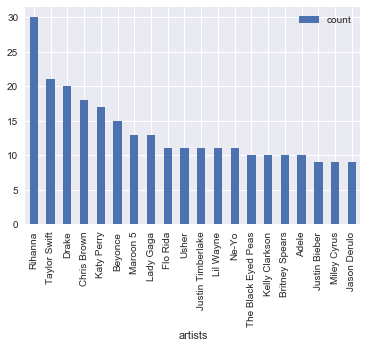

In [187]:
d.plot(x='artists', y='count', kind='bar')
plt.xticks(rotation=90)
plt.show()

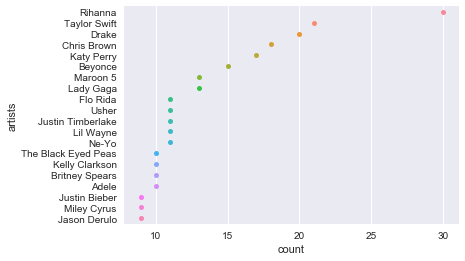

In [185]:
sns.stripplot(x="count", y="artists", data=d)
#plt.xticks(rotation='vertical')


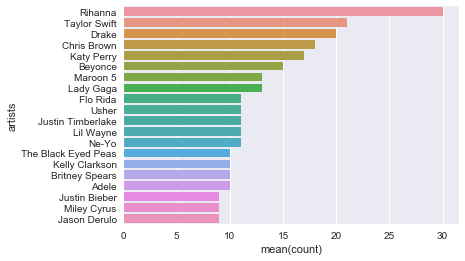

In [193]:
sns.barplot(x="count", y="artists", data=d);

In [3]:
top_artist = pd.read_csv('billtopar.csv')

In [4]:
all_time = pd.read_csv('billall.csv')

In [5]:
top_rap = pd.read_csv('billtoprap.csv')

In [6]:
top_rb = pd.read_csv('billtoprb.csv')

In [7]:
top_rock = pd.read_csv('billtoprock.csv')

In [8]:
top_country = pd.read_csv('billtopcountry.csv')

In [9]:
top_edm = pd.read_csv('billtopedm.csv')

In [10]:
top_song.groupby(["year"]).apply(lambda x: x.sort_values(["ranking"], ascending = True))

artists  \
year                                                           
2006 0                                         Daniel Powter   
     1                                             Sean Paul   
     2                     Nelly Furtado Featuring Timbaland   
     3                                           James Blunt   
     4                         Shakira Featuring Wyclef Jean   
     5                                   Natasha Bedingfield   
     6                                        Gnarls Barkley   
     7                 Chamillionaire Featuring Krayzie Bone   
     8                                     Justin Timberlake   
     9                           Beyonce Featuring Slim Thug   
     10                                        Mary J. Blige   
     11                Nelly Featuring Paul Wall, Ali & Gipp   
     12                                             The Fray   
     13                                               Cassie   
     14              The Pussycat Dolls Featuring Snoop Dogg   
     15                                          Chris Brown   
     16                                                Ne-Yo   
     17                                             Yung Joc   
     18                                              Rihanna   
     19                                  Panic! At The Disco   
     20                             The All-American Rejects   
     21                                               Fergie   
     22                                Red Hot Chili Peppers   
     23    Lil Jon Featuring E-40 & Sean Paul Of The Youn...   
     24    Dem Franchize Boyz Featuring Lil Peanut & Charlay   
     25                                        Rascal Flatts   
     26                                             The Fray   
     27                                              Rihanna   
     28                                          Snow Patrol   
     29                                               Hinder   
...                                                      ...   
2016 1060                                            Beyonce   
     1061                                         The Weeknd   
     1062                                           Coldplay   
     1063                                         Tory Lanez   
     1064                                       Travis Scott   
     1065                                             Ruth B   
     1066                Ariana Grande Featuring Nicki Minaj   
     1067                                               Daya   
     1068                                       Taylor Swift   
     1069                DJ Snake Featuring Bipolar Sunshine   
     1070                                     Ellie Goulding   
     1071                         Drake Featuring The Throne   
     1072                                              Adele   
     1073                                               Daya   
     1074                Major Lazer & DJ Snake Featuring MO   
     1075                      Shawn Mendes & Camila Cabello   
     1076                                       Fat Joe, Rem   
     1077                                            Silento   
     1078                                        Chris Brown   
     1079                         Usher Featuring Young Thug   
     1080                 O.T. Genasis Featuring Young Dolph   
     1081                                        Kevin Gates   
     1082                  Fifth Harmony Featuring Fetty Wap   
     1083             Hailee Steinfeld & Grey Featuring Zedd   
     1084                                           Coldplay   
     1085                                         Tim McGraw   
     1086                                             Future   
     1087                                          Desiigner   
     1088                 Wiz Khalifa Featuring Charlie Puth   
     1089                                      One Direction   

                    

In [201]:
singer_gender = pd.read_csv('singers_gender.csv',encoding='latin-1')
singer_gender = singer_gender.rename(columns={'artist': 'artists'})
singer_gender.head(10)

,artists,gender,category
0,12 Gauge,male,African-American_male_rappers
1,1987,male,Swedish_male_singers
2,2 Chainz,male,African-American_male_rappers
3,2 Pistols,male,African-American_male_rappers
4,21 Savage,male,African-American_male_rappers
5,40 Cal.,male,African-American_male_rappers
6,40 Glocc,male,African-American_male_rappers
7,50 Cent,male,African-American_male_rappers
8,6 Tre G,male,American_male_rappers
9,60 Second Assassin,male,African-American_male_rappers


In [203]:
joinjoinjoin = pd.merge(top_ar, singer_gender, on='artists', how='left')
joinjoinjoin

,artists,name,ranking,year,gender,category
0,Daniel Powter,BAD DAY,1,2006,male,Canadian_male_singers
1,Sean Paul,TEMPERATURE,2,2006,NaN,NaN
2,Nelly Furtado Featuring Timbaland,PROMISCUOUS,3,2006,NaN,NaN
3,James Blunt,YOU'RE BEAUTIFUL,4,2006,male,English_male_singers
4,Shakira Featuring Wyclef Jean,HIPS DON'T LIE,5,2006,NaN,NaN
5,Natasha Bedingfield,UNWRITTEN,6,2006,female,English_female_pop_singers
6,Gnarls Barkley,CRAZY,7,2006,NaN,NaN
7,Chamillionaire Featuring Krayzie Bone,RIDIN',8,2006,NaN,NaN
8,Justin Timberlake,SEXYBACK,9,2006,male,American_male_pop_singers
9,Beyonce Featuring Slim Thug,CHECK ON IT,10,2006,NaN,NaN


In [224]:
joinjoinjoin.gender.isnull().sum()
#.values.ravel().sum()

639

In [206]:
np.count_nonzero(joinjoinjoin.isnull().values)  

1278